Initial Attempt on PCA with dataset

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

from scipy import stats
from sklearn import cluster, metrics # these will be useful
from sklearn import decomposition, metrics # these will be useful

from sklearn.decomposition import PCA
import matplotlib.cm as cm

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
file_path = path.join('/home/amy/Documents/GitHub/SP23-BENG213/Project/Data Organization Attempt/A549/0_down_matrix.csv')
data_raw = pd.read_csv(file_path,index_col=0)
#data_raw.rename(columns = {'Unnamed: 0':'Genes'}, inplace = True)
#data_raw.set_index('Genes')

In [3]:
data_raw


,AZD-8055,Dactolisib,Dasatinib,MK-2206,Nintedanib,Mirdametinib,Pictilisib,Refametinib,Selumetinib,Staurosporine,Tideglusib
"SAFB, SAFB2",1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.340554,1.000000
"HSP90AB1, HSP90AB3P",1.000000,1.0,1.000000,0.291163,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
PTPN11,1.000000,1.0,0.113997,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
CCDC92,1.000000,1.0,1.000000,0.420152,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
SIPA1L2,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.345353,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
PRPF3,1.000000,1.0,0.350508,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
AZI1,1.000000,1.0,0.549877,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
RPL28,1.000000,1.0,0.226305,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
CDK13,0.578888,1.0,0.379418,1.000000,1.0,1.0,1.0,1.0,1.0,0.595935,0.524806


In [4]:
# data is already in mxn matrix according to the requirement
# normalize
norm_data = stats.zscore(data_raw, axis=1)
# compute the covariance matrix
cov_data = np.corrcoef(norm_data)

In [33]:
pca = PCA()
data_pc = pca.fit_transform(data_raw.T)
data_pc = pd.DataFrame(data_pc, index = data_raw.columns)

In [34]:
# most important genes in pc1
temp = pca.components_[0].tolist()
PC1 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_1 = []
weights_1 = []
for i in range(5):
    most_important = max(PC1)
    most_important_names = initial_feature_names[PC1.index(most_important)]
    PC1.remove(max(PC1))
    initial_feature_names.remove(most_important_names)
    genes_1.append(most_important_names)
    weights_1.append(most_important)

# most important genes in pc2
temp = pca.components_[1].tolist()
PC2 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_2 = []
weights_2 = []
for i in range(5):
    most_important = max(PC2)
    most_important_names = initial_feature_names[PC2.index(most_important)]
    PC2.remove(max(PC2))
    initial_feature_names.remove(most_important_names)
    genes_2.append(most_important_names)
    weights_2.append(most_important)
    
print("The 5 genes with the highest absolute component weighting from PC 1 are", *genes_1)
print("The 5 genes with the highest absolute component weighting from PC 2 are", *genes_2)

The 5 genes with the highest absolute component weighting from PC 1 are CFL2 DDX21 CAMSAP2 PLEKHA6 GPRC5C
The 5 genes with the highest absolute component weighting from PC 2 are ZCCHC6 SRRM1 HN1L BRF1 PPP1R12B


In [36]:
# calculates explained variance
EV1 = round(pca.explained_variance_ratio_[0]*100, 2)
EV2 = round(pca.explained_variance_ratio_[1]*100, 2)
# get sample by PC1 and PC2 weights
PC1 = data_pc.iloc[:,0].tolist()
PC2 = data_pc.iloc[:,1].tolist()

In [37]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
genes_names = data_raw.index.tolist()
columns = [str(x) for x in range(10 + 1)]
loadings_df = pd.DataFrame(loadings, genes_names, columns)

In [42]:
arrow_1 = []
arrow_2 = []
for i in genes_1:
    arrow_1.append(loadings_df.at[i,"0"]*20)
    arrow_2.append(loadings_df.at[i,"1"]*20)
for i in genes_2:
    arrow_1.append(loadings_df.at[i,"0"]*20)
    arrow_2.append(loadings_df.at[i,"1"]*20)

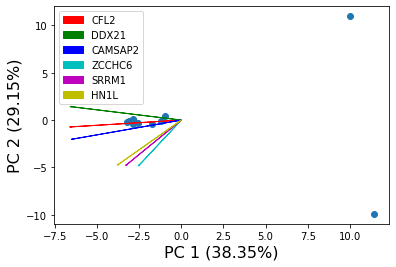

In [43]:
# make the plot
plt.xlabel("PC 1 (" + str(EV1)+ "%)", fontsize = 16)
plt.ylabel("PC 2 (" + str(EV2)+ "%)", fontsize = 16)
plt.scatter(PC1, PC2)
arrow1 = plt.arrow(0,0,arrow_1[0],arrow_2[0], head_width=0.1, head_length=0.1, label = genes_1[0], color = "r")
arrow2 = plt.arrow(0,0,arrow_1[1],arrow_2[1], head_width=0.1, head_length=0.1, label = genes_1[1], color = "g")
arrow3 = plt.arrow(0,0,arrow_1[2],arrow_2[2], head_width=0.1, head_length=0.1, label = genes_1[2], color = "b")
arrow4 = plt.arrow(0,0,arrow_1[5],arrow_2[5], head_width=0.1, head_length=0.1, label = genes_2[0], color = "c")
arrow5 = plt.arrow(0,0,arrow_1[6],arrow_2[6], head_width=0.1, head_length=0.1, label = genes_2[1], color = "m")
arrow6 = plt.arrow(0,0,arrow_1[7],arrow_2[7], head_width=0.1, head_length=0.1, label = genes_2[2], color = "y")
plt.legend([arrow1,arrow2,arrow3,arrow4,arrow5,arrow6], [genes_1[0],genes_1[1],genes_1[2],genes_2[0],genes_2[1],genes_2[2]])


Thoughts:
there are two drugs that resulted in significantly more PTM than the rest 9
it might make more sense just to compare the remaining 9 against each other for more discovery


CFL2 DDX21 CAMSAP2 PLEKHA6 GPRC5C

CFL2:Cofilin-2 - controls polymerization of actin, regulation is sensitive to pH

DDX21:Nucleolar RNA helicase 2,Isoform 2 of Nucleolar RNA helicase 2

CAMSAP2:Calmodulin-regulated spectrin-associated protein 2,Isoform 2 of Calmodulin-regulated spectrin-associated protein 2,Isoform 3 of Calmodulin-regulated spectrin-associated protein 2
Key microtubule-organizing protein that specifically binds the minus-end of non-centrosomal microtubules and regulates their dynamics and organization

PLEKHA6:Pleckstrin homology domain-containing family A
Pleckstrin homology (PH) domains represent the 11th most common domain in the human proteome. They are best known for their ability to bind phosphoinositides with high affinity and specificity, although it is now clear that less than 10% of all PH domains share this property.

GPRC5C:G-protein coupled receptor family C group 5 member C,Isoform 2 of G-protein coupled receptor family C group 5 member C
This retinoic acid-inducible G-protein coupled receptor provide evidence for a possible interaction between retinoid and G-protein signaling pathways